In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Aaryant31/ML_Supervised_learning-Practice/main/Tree%20Based%20Method/rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

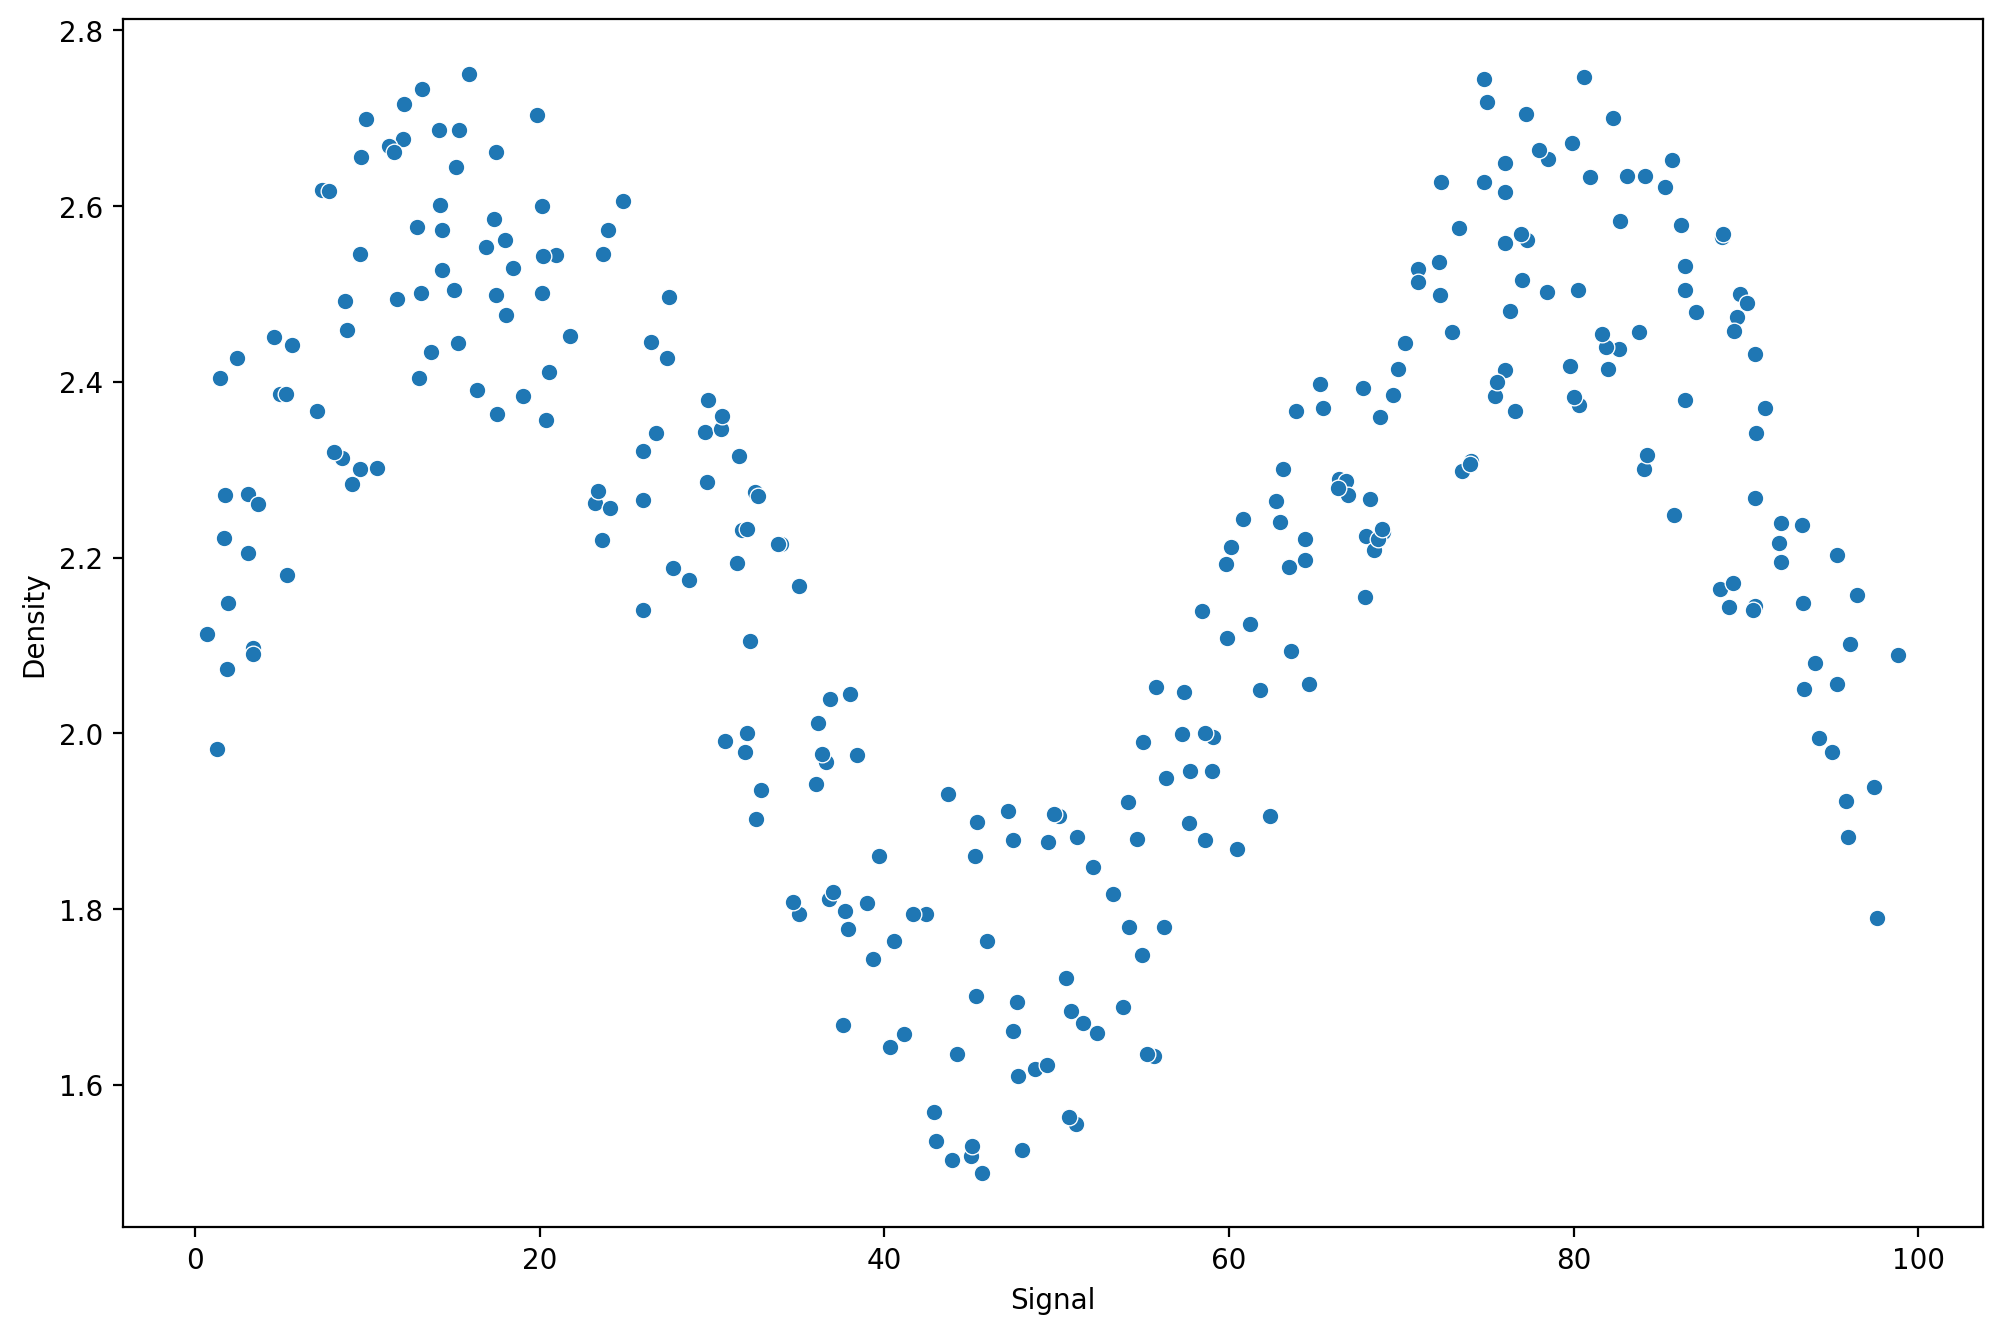

In [5]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [6]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model = LinearRegression()

In [11]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [12]:
lr_preds = lr_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [15]:
signal_range = np.arange(0,100)

In [16]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

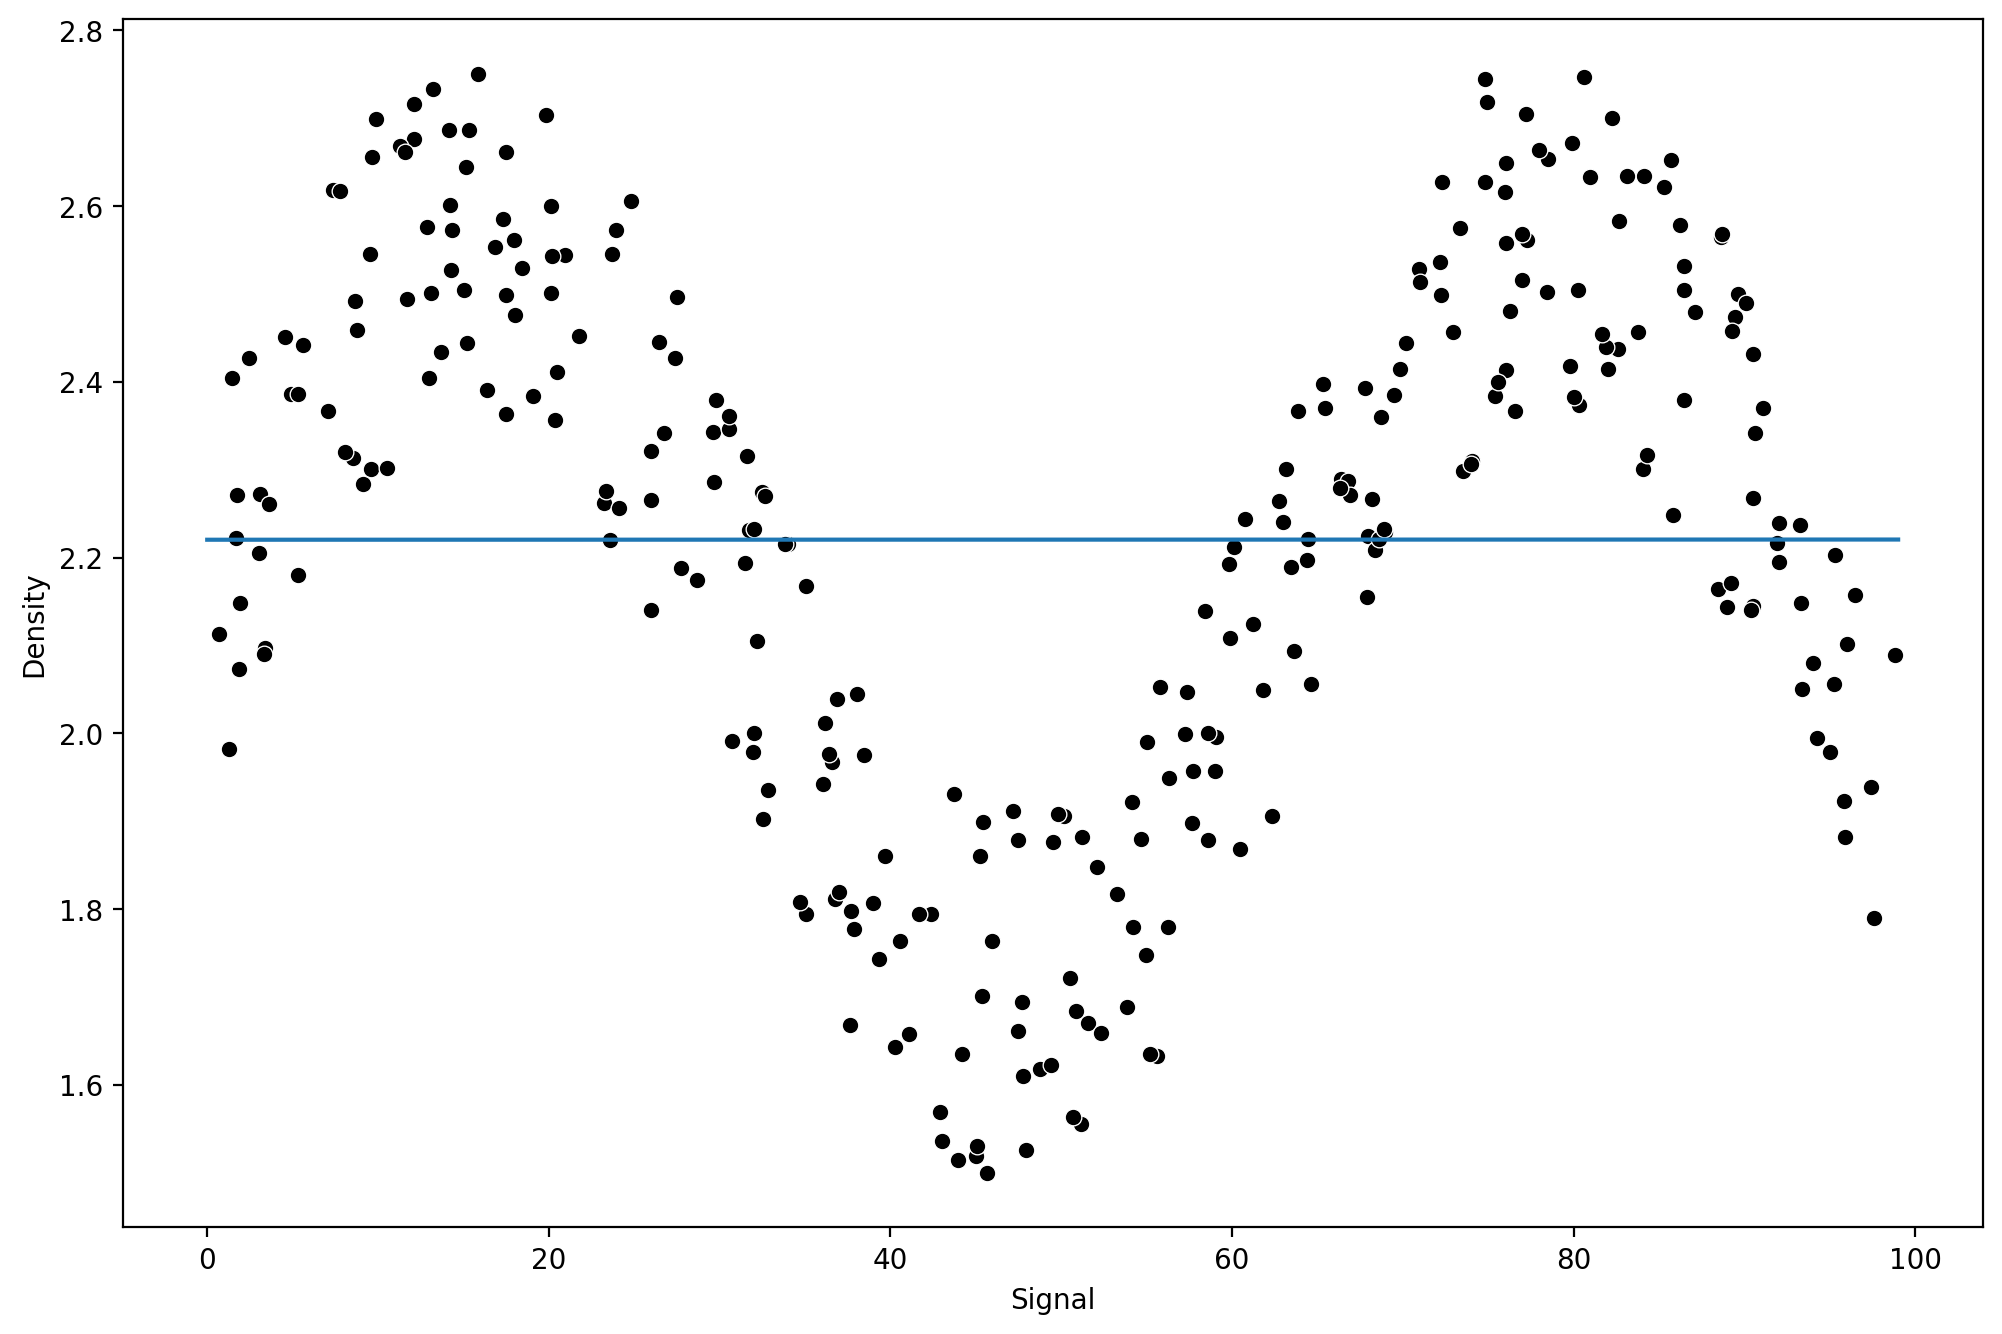

In [17]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

# Polynomial Regression

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

above function helps us to run model with diffirent algorithms

RMSE : 0.2570051996584629


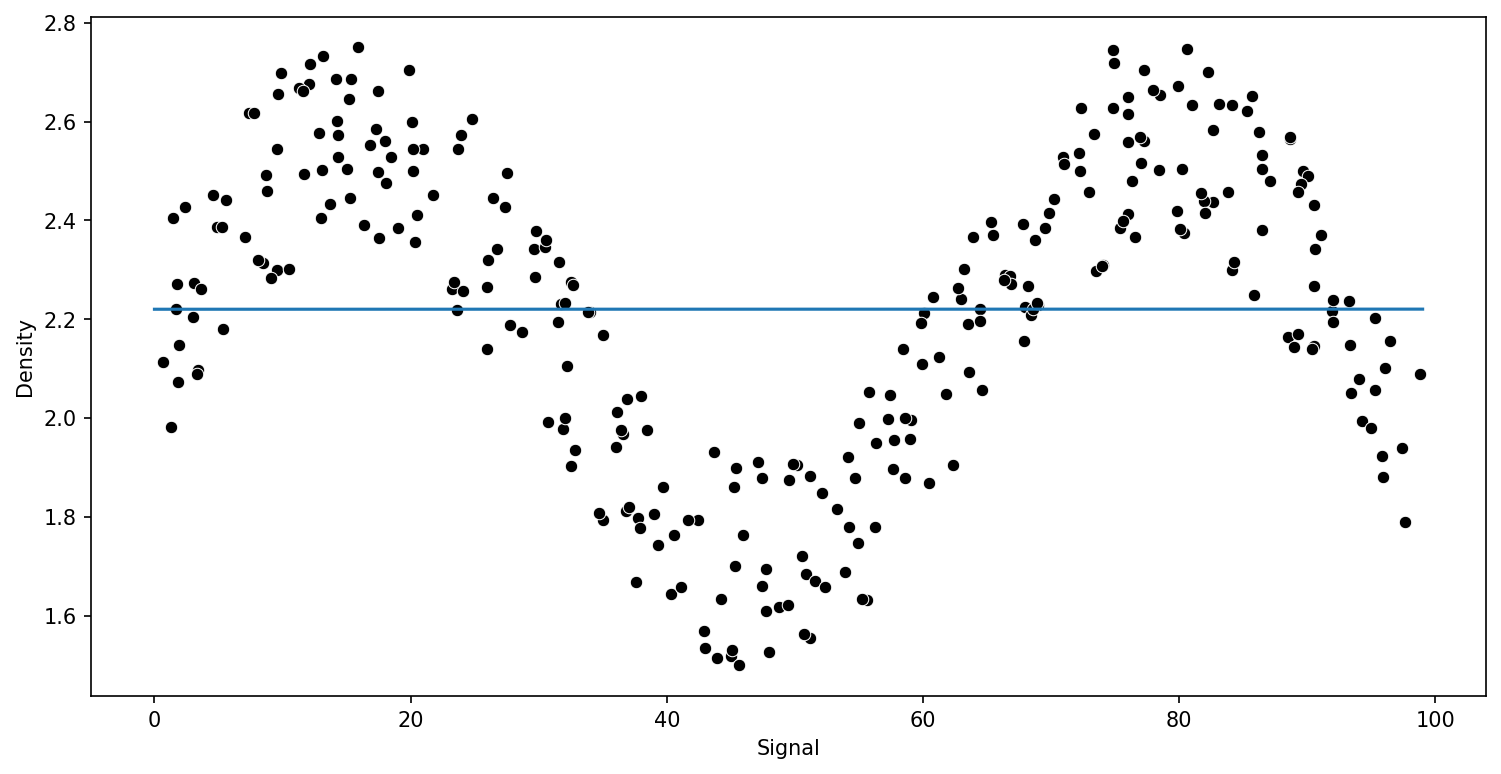

In [20]:
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [32]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

In [ ]:
#pipe.fit(X_train,y_train)

RMSE : 0.28173095637255463


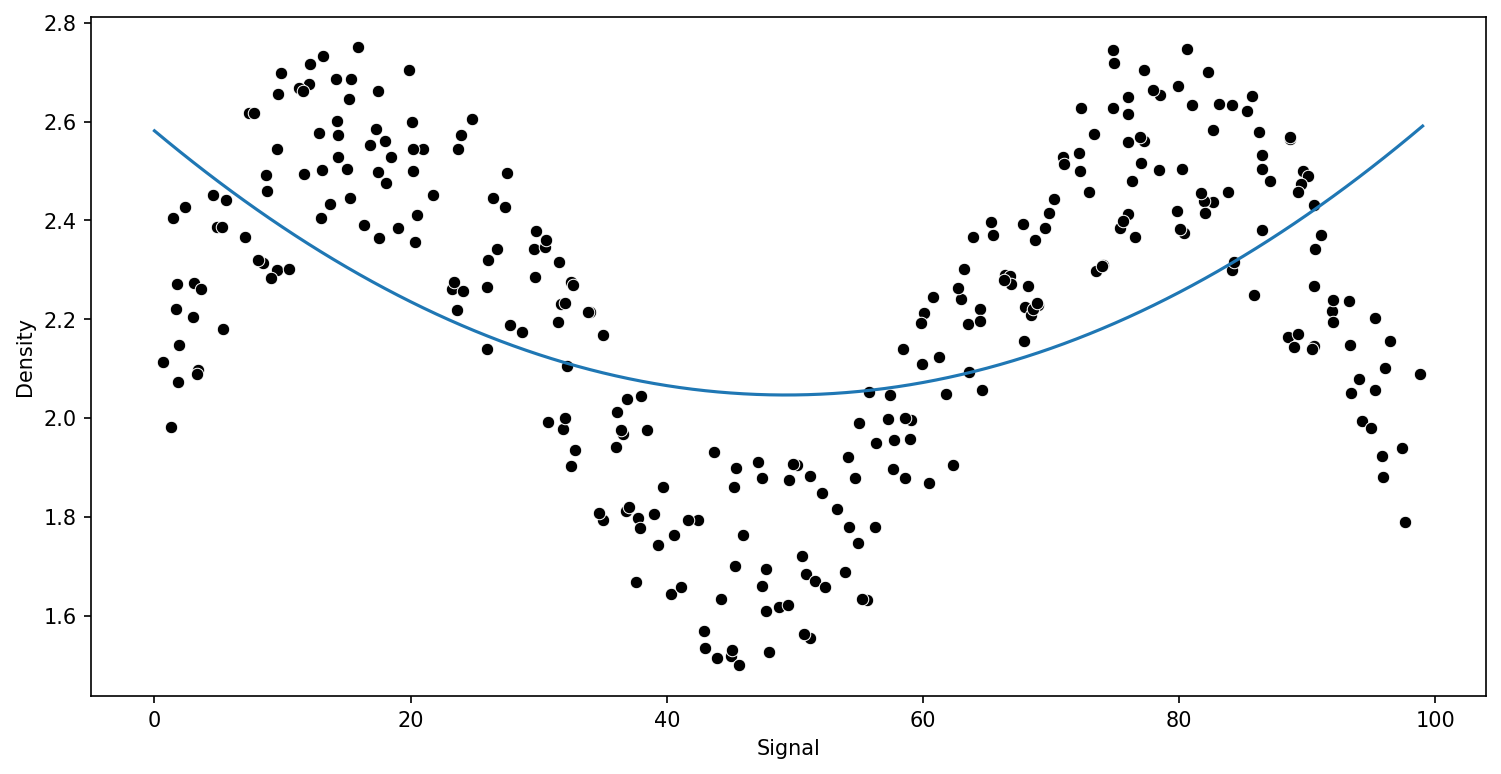

In [33]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [36]:
pipe10=make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

RMSE : 0.13807383449323551


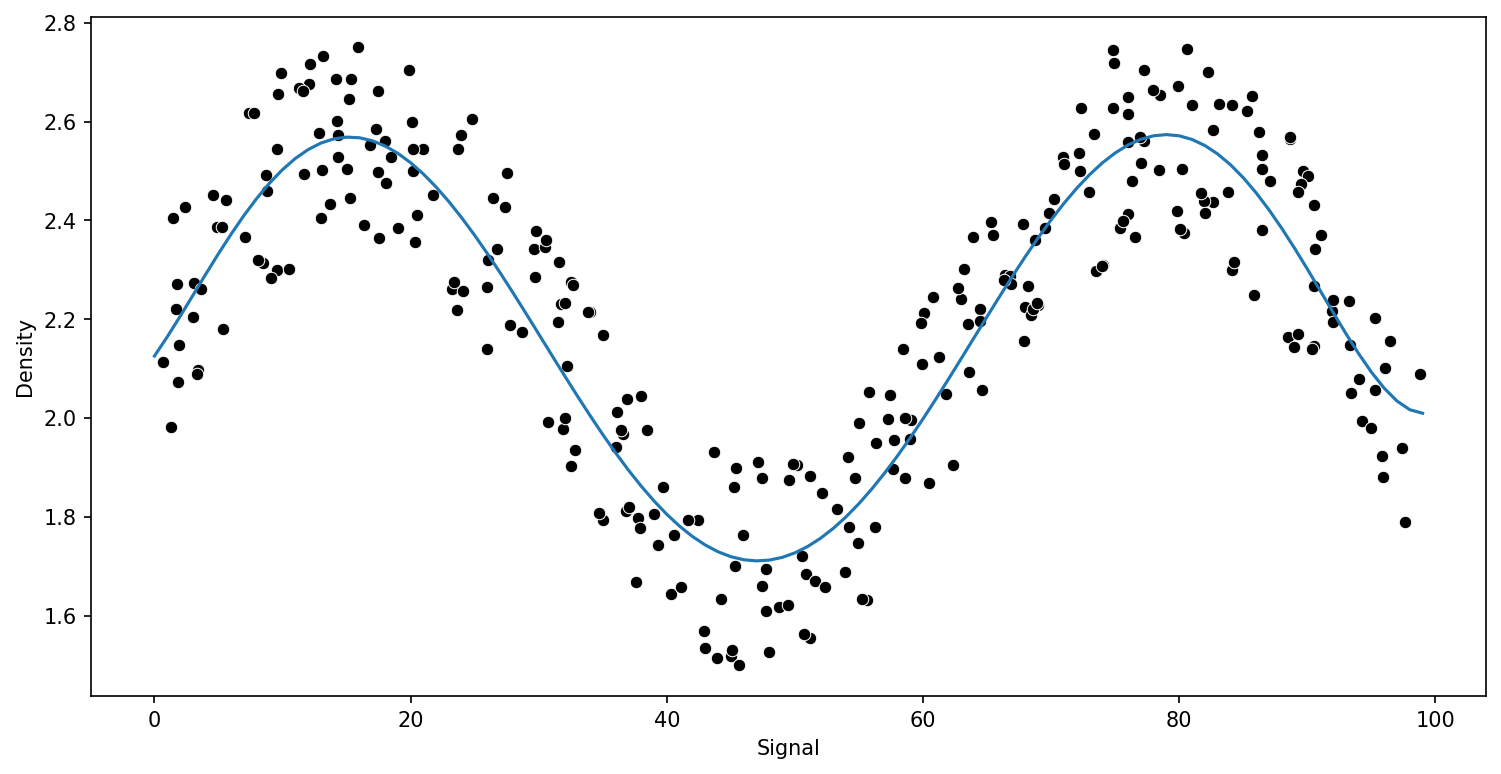

In [37]:
run_model(pipe10,X_train,y_train,X_test,y_test)

In [38]:
pipe10=make_pipeline(PolynomialFeatures(degree=7),LinearRegression())

RMSE : 0.1361534844595092


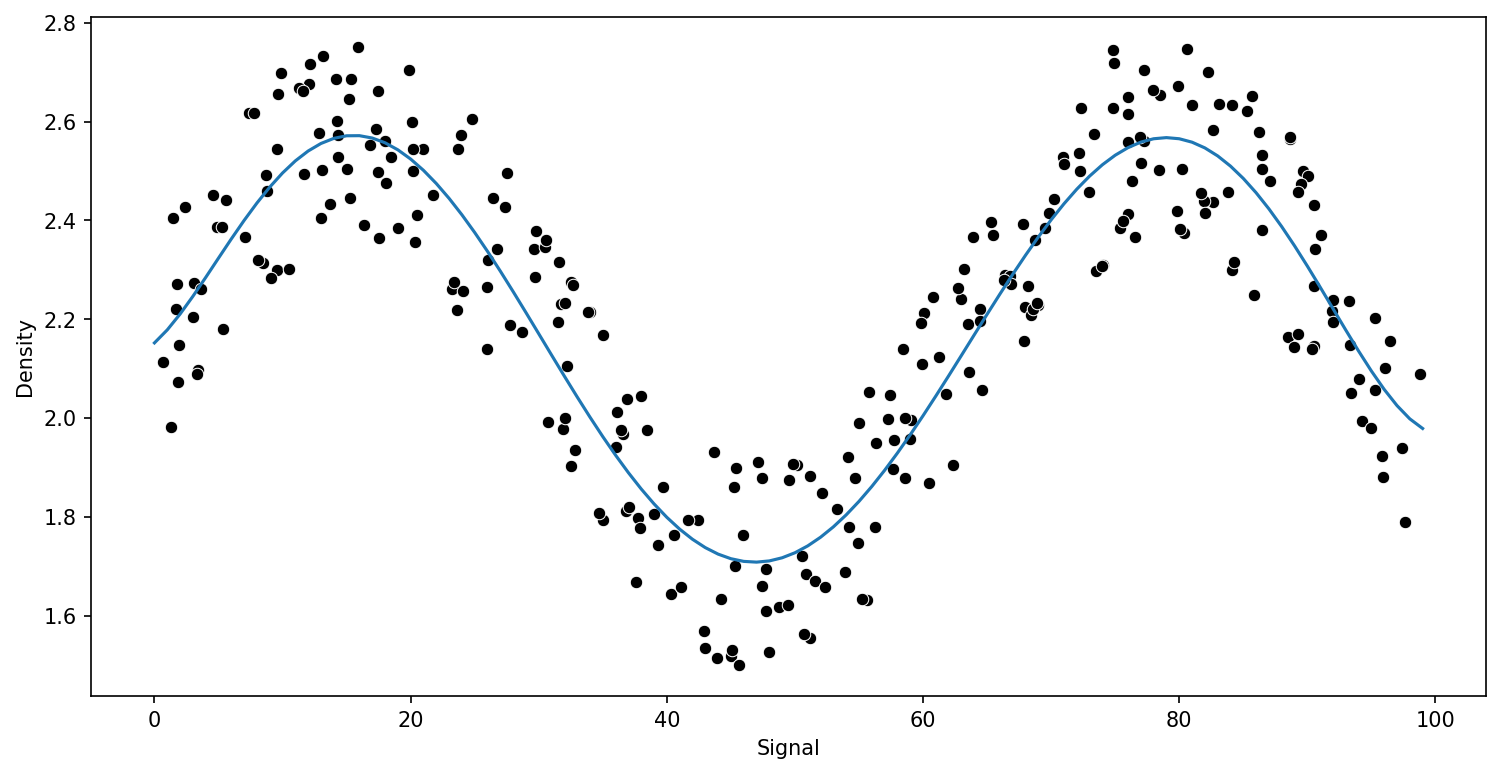

In [39]:
run_model(pipe10,X_train,y_train,X_test,y_test)